# Without PCA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('C:\\Users\\RANA ASIM\\Downloads\\archive (4)\\mnist train.csv')
df.sample(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
4949       8       0       0       0       0       0       0       0       0   
23374      1       0       0       0       0       0       0       0       0   
31732      3       0       0       0       0       0       0       0       0   
29783      2       0       0       0       0       0       0       0       0   
12609      8       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
4949        0  ...         0         0         0         0         0   
23374       0  ...         0         0         0         0         0   
31732       0  ...         0         0         0         0         0   
29783       0  ...         0         0         0         0         0   
12609       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
4949          0         0         0         0         0  
23374         0         0         0         0         0  
31732         0         0         0         0         0  
29783         0         0         0         0         0  
12609         0         0         0         0         0  

[5 rows x 785 columns]

In [3]:
df.shape

(42000, 785)

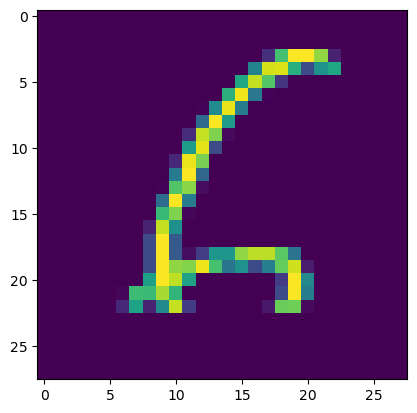

In [4]:
plt.imshow(df.iloc[8280,1:].values.reshape(28,28))

In [5]:
X=df.drop('label',axis=1)
y=df['label']
print('shape of X',X.shape)
print('shape of y',y.shape)

shape of X (42000, 784)
shape of y (42000,)


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print('sahpe of X_train',X_train.shape)
print('sahpe of y_train',y_train.shape)
print('sahpe of X_test',X_test.shape)
print('sahpe of y_test',y_test.shape)

sahpe of X_train (33600, 784)
sahpe of y_train (33600,)
sahpe of X_test (8400, 784)
sahpe of y_test (8400,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [90]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [91]:
import time
start=time.time() #just to see how much time it consume
y_pred=knn.predict(X_test)
print(time.time() - start)

420.1766736507416


In [92]:
accuracy_score(y_test,y_pred)

0.9648809523809524

# By Using PCA

In [8]:
sc=StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [9]:
#PCA
pca=PCA(n_components=100)

In [10]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [11]:
X_train_trf.shape

(33600, 100)

In [12]:
knn.fit(X_train_trf,y_train)
y_pred=knn.predict(X_test_trf)

In [13]:
accuracy_score(y_test,y_pred)

0.9536904761904762

In [14]:
for i in range(1,785):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred=knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred))

0.25833333333333336
0.3238095238095238
0.5104761904761905
0.6664285714285715
0.7373809523809524
0.8223809523809524
0.8432142857142857
0.8720238095238095
0.8869047619047619
0.9054761904761904
0.9108333333333334
0.9177380952380952
0.9265476190476191
0.935
0.9392857142857143
0.9376190476190476
0.9414285714285714
0.9413095238095238
0.9434523809523809
0.9441666666666667
0.9432142857142857
0.9442857142857143
0.9447619047619048
0.945
0.9464285714285714
0.9483333333333334
0.9475
0.9478571428571428
0.95
0.9501190476190476
0.9507142857142857
0.9521428571428572
0.9504761904761905
0.9501190476190476
0.9517857142857142
0.9515476190476191
0.9533333333333334
0.9521428571428572
0.9527380952380953
0.9533333333333334
0.9542857142857143
0.9523809523809523
0.9519047619047619
0.9529761904761904
0.9536904761904762
0.9542857142857143
0.9532142857142857
0.9545238095238096
0.9535714285714286
0.9535714285714286
0.9538095238095238
0.9539285714285715
0.9548809523809524
0.9541666666666667
0.9539285714285715
0.9539

KeyboardInterrupt: 

# PCA for Visualization

# 2D visualization

In [18]:
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)
X_train_trf

array([[-2.71862005, -0.49001064],
       [-0.67701295, -6.75351428],
       [-3.03323407,  6.50997486],
       ...,
       [ 2.14882089,  0.7807336 ],
       [ 1.05959284,  0.94753869],
       [17.70255452,  1.96192315]])

In [40]:
import plotly.express as px #use plotly for dynamic visualization #2D
y_train_trf= y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
              y=X_train_trf[:,1],color=y_train_trf)
fig.show()

# 3D visualization

In [34]:
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)
X_train_trf

array([[-2.71863978, -0.489614  ,  1.13523506],
       [-0.67695516, -6.75411348, -2.3343863 ],
       [-3.03323756,  6.50984005,  7.49140942],
       ...,
       [ 2.14883959,  0.7807516 , -0.74612608],
       [ 1.05954818,  0.9481899 ,  3.94901925],
       [17.70253896,  1.96262533, -4.94464529]])

In [38]:
y_train_trf= y_train.astype(str)
fig=px.scatter_3d(x=X_train_trf[:,0],
              y=X_train_trf[:,1],z=X_train[:,3],color=y_train_trf)
fig.show()

In [41]:
pca.explained_variance_
#Eigen values

array([40.67111198, 29.17023388, 26.74459553])

In [43]:
pca.components_
#Eigen vectors

array([[-3.48122153e-18, -6.69079423e-19,  2.21709086e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.06076666e-16,  2.14757496e-17, -4.34566502e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.90024189e-17, -1.62396501e-17, -1.10641763e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [44]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

# Finding optimum number of PCA


In [46]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)


In [48]:
pca.explained_variance_.shape

(784,)

In [51]:
pca.components_.shape

(784, 784)

In [53]:
np.cumsum(pca.explained_variance_ratio_)  #perform commulative sum

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

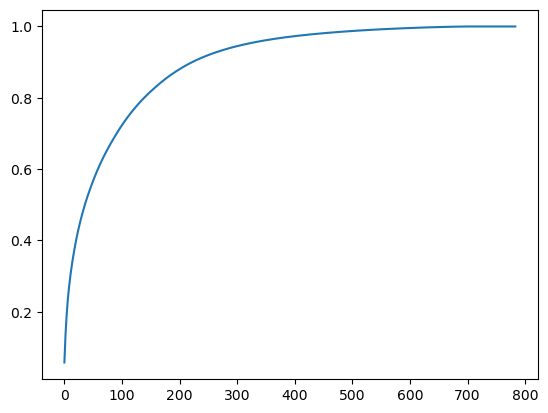

In [54]:
plt.plot(np.cumsum(pca.explained_variance_ratio_) )